In [29]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import StandardScaler, scale

In [30]:
df = pd.read_csv('Datasets/absenteeism_processed.csv')

In [31]:
df.head(10)

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0
5,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
6,361.0,52.0,3.0,28.0,239.554,80.0,172.0,27.0,8.0
7,260.0,50.0,11.0,36.0,239.554,65.0,168.0,23.0,4.0
8,155.0,12.0,14.0,34.0,239.554,95.0,196.0,25.0,40.0
9,235.0,11.0,14.0,37.0,239.554,88.0,172.0,29.0,8.0


In [32]:
df.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271.490235,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39.058116,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205.917000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244.387000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,108.000000,196.000000,38.000000,120.000000


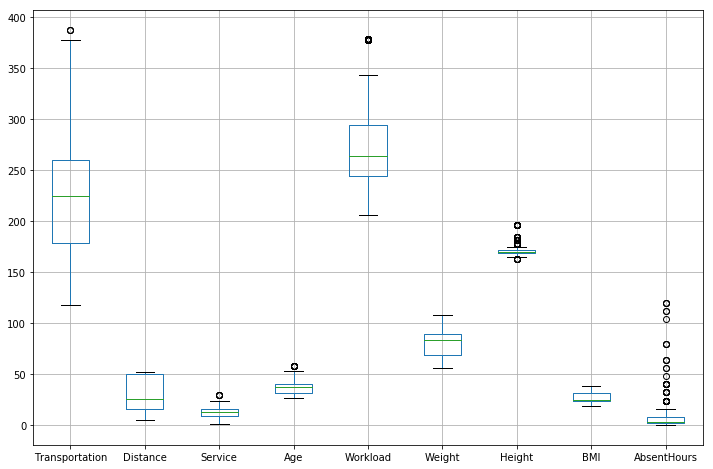

In [33]:
df.boxplot(figsize=(12, 8))

In [34]:
scaled_df = pd.DataFrame()

scaled_df['Transportation'] = scale(df['Transportation'])
scaled_df['Distance'] = scale(df['Distance'])
scaled_df['AbsentHours'] = scale(df['AbsentHours'])

In [35]:
scaled_df.describe()

,Transportation,Distance,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,8.487898e+00


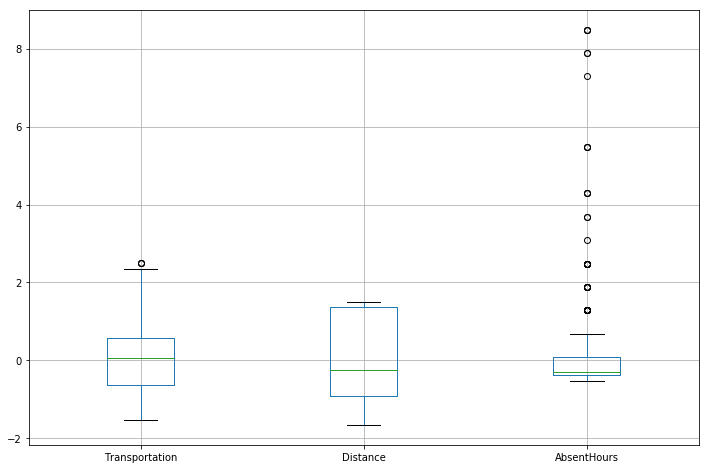

In [36]:
scaled_df.boxplot(figsize=(12, 8))

In [37]:
scaled_array = scale(df, copy=True, with_mean=True, with_std=True)

In [38]:
type(scaled_array)

numpy.ndarray

In [39]:
scaled_array.shape

(740, 9)

In [40]:
scaled_df = pd.DataFrame(scale(df), columns=df.columns)

In [41]:
scaled_df.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,-3.660735e-17,-4.626929e-16,1.866148e-15,2.794311e-17,-1.015329e-15,-1.215244e-16,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-2.636762e+00,-1.459596e+00,-1.679999e+00,-1.789206e+00,-1.511357e+00,-1.792627e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-8.110742e-01,-8.417777e-01,-6.943900e-01,-7.794581e-01,-5.164829e-01,-6.251003e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,1.017698e-01,8.495004e-02,-1.855218e-01,3.079626e-01,-3.506706e-01,-3.915949e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,7.864028e-01,5.483139e-01,5.822640e-01,7.740000e-01,-1.904601e-02,1.009438e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,3.753146e+00,3.328497e+00,2.751449e+00,2.249785e+00,3.960449e+00,2.643976e+00,8.487898e+00


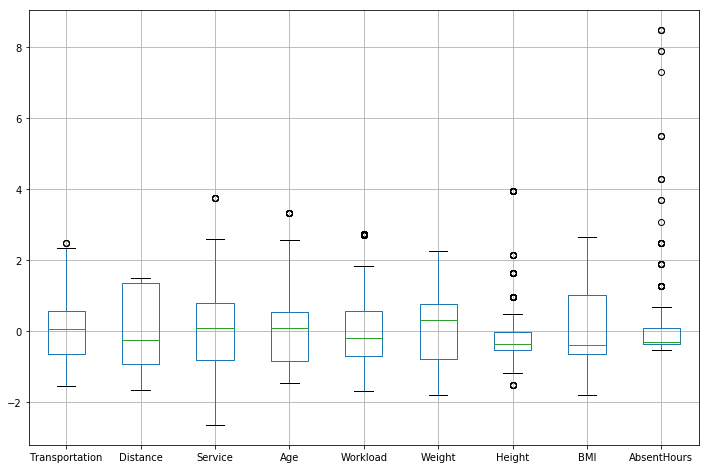

In [42]:
scaled_df.boxplot(figsize=(12, 8))

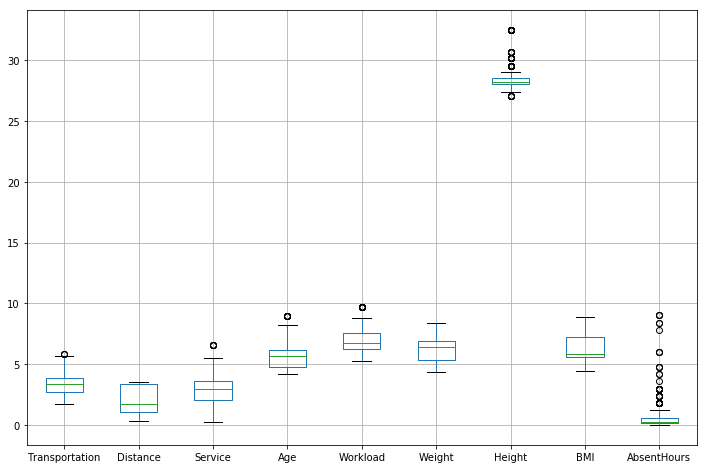

In [43]:
scaled_df = pd.DataFrame(scale(df, with_mean=False), columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

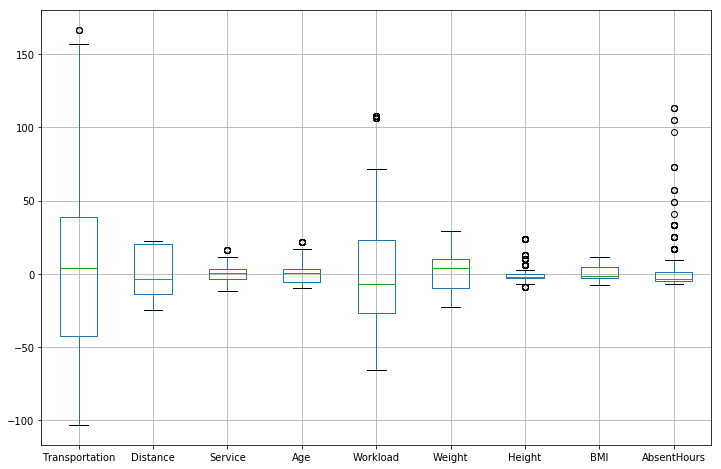

In [44]:
scaled_df = pd.DataFrame(scale(df, with_std=False), columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

In [45]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
std_scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_array = std_scaler.transform(df)

In [48]:
scaled_array.shape

(740, 9)

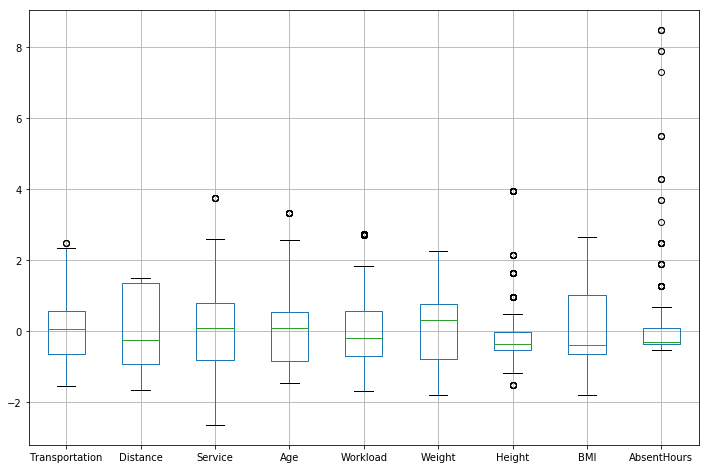

In [49]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

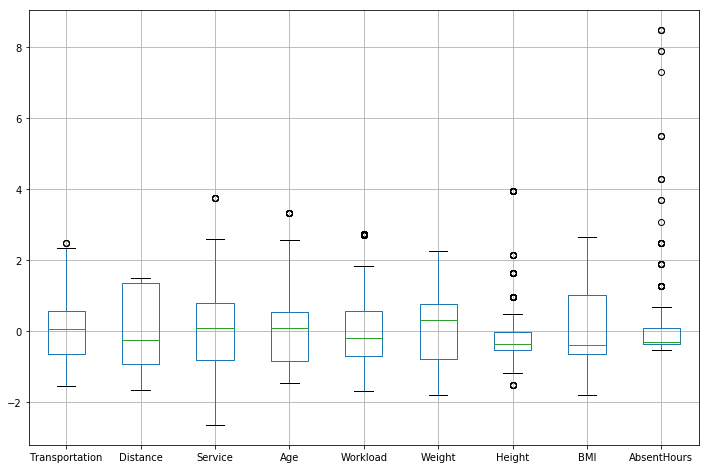

In [50]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_array = std_scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

scaled_df.boxplot(figsize=(12, 8))

In [57]:
std_scaler.mean_

array([221.32972973,  29.63108108,  12.55405405,  36.45      ,
       271.49023514,  79.03513514, 172.11486486,  26.67702703,
         6.92432432])

In [58]:
std_scaler.var_

array([4476.54262966,  219.83281775,   19.20113221,   41.91777027,
       1523.47490444,  165.75281958,   36.3719412 ,   18.34028305,
        177.47535427])

In [61]:
std_scaler.scale_

array([66.90696996, 14.82676019,  4.38190965,  6.47439343, 39.03171665,
       12.87450269,  6.03091545,  4.28255567, 13.32198762])

In [60]:
std_scaler.n_samples_seen_

740

### Bessel's correction

In [51]:
n = df.shape[0]

bessels_correction_adjustment = math.sqrt((n-1) / n)
bessels_correction_adjustment

0.9993240959011489

In [52]:
scaled_df['Distance_Bessels'] = (scaled_df['Distance'] - scaled_df['Distance'].mean()) /\
        (scaled_df['Distance'].std() * bessels_correction_adjustment)

In [53]:
scaled_df[['Distance', 'Distance_Bessels']].head(10)

,Distance,Distance_Bessels
0,0.429556,0.429556
1,-1.121694,-1.121694
2,1.441240,1.441240
3,-1.661258,-1.661258
4,0.429556,0.429556
5,1.441240,1.441240
6,1.508686,1.508686
7,1.373794,1.373794
8,-1.189139,-1.189139
9,-1.256585,-1.256585


## Robust scaler

In [114]:
def robust_scale_manual(x, median, q25, q75):
    
    scaled = (x - median) / (q75 - q25)
    
    return scaled

In [115]:
median = simple_df['scores'].median()

q25 = simple_df['scores'].quantile(q=0.25)

q75 = simple_df['scores'].quantile(q=0.75)

In [116]:
simple_df['robust_scaled_scores'] = simple_df['scores']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

In [117]:
simple_df.head()

,students,scores,scaled_scores,robust_scaled_scores
0,Alice,40.0,-1.355815,-0.833333
1,Bob,42.0,-0.813489,-0.500000
2,Charlie,45.0,0.000000,0.000000
3,Dory,48.0,0.813489,0.500000
4,Emily,50.0,1.355815,0.833333


In [118]:
new_df = pd.DataFrame({
    'students': ['Outlier'],
    'scores': [100]
})

In [119]:
simple_df = simple_df.append(new_df, sort=False)

In [120]:
simple_df['scaled_scores'] = scale(simple_df['scores'])

In [121]:
median = simple_df['scores'].median()

q25 = simple_df['scores'].quantile(q=0.25)

q75 = simple_df['scores'].quantile(q=0.75)

simple_df['robust_scaled_scores'] = simple_df['scores']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

In [122]:
simple_df

,students,scores,scaled_scores,robust_scaled_scores
0,Alice,40.0,-0.682011,-0.962963
1,Bob,42.0,-0.585727,-0.666667
2,Charlie,45.0,-0.441301,-0.222222
3,Dory,48.0,-0.296875,0.222222
4,Emily,50.0,-0.200591,0.518519
0,Outlier,100.0,2.206506,7.925926


## Normalization

In [ ]:
normalizer = Normalizer(copy=True, norm='l2')
normalizer = Normalizer(copy=True, norm='l2')

normalized_array = normalizer.fit_transform(driver_df)

normalized_df = pd.DataFrame(normalized_array, columns=driver_df.columns)

normalized_df.head()

## Binarizer

In [1]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import Binarizer, binarize

In [23]:
num_list = [[ -1000, 0],
            [  500, -3000],
            [  100, 650]]

In [24]:
binarizer = Binarizer()
binarizer

Binarizer(copy=True, threshold=0.0)

In [25]:
binarizer.fit(num_list)

Binarizer(copy=True, threshold=0.0)

In [26]:
binarized_list = binarizer.transform(num_list)

binarized_list

array([[0, 0],
       [1, 0],
       [1, 1]])

In [27]:
binarizer = Binarizer(threshold=500)

binarizer.fit_transform(num_list)

array([[0, 0],
       [0, 0],
       [0, 1]])

In [35]:
binarizer = Binarizer(threshold=[0, 100])

binarizer.fit_transform(num_list)

array([[0, 0],
       [1, 0],
       [1, 1]])

### Using the binarizer to make numeric values categorical

In [66]:
diet_data = pd.read_csv('Datasets/diet_data.csv')

In [68]:
diet_data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,08/01/18,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,08/02/18,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,08/03/18,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [69]:
diet_data = diet_data.dropna()

diet_data = diet_data.drop(['Date', 'Stone', 'Pounds', 'Ounces'], axis=1)

In [70]:
diet_data = diet_data.astype(np.float64)

In [71]:
diet_data.head()

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [72]:
diet_data.describe()

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2687.700000,3180.714286,1.183643,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,28.663189,1478.753433,0.551700,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,2628.000000,1400.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,2670.000000,2187.500000,0.807500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,2689.000000,2575.000000,0.955000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,2704.000000,3850.000000,1.450000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,2768.000000,9150.000000,3.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


In [73]:
median_calories = diet_data['calories'].median()

median_calories

2575.0

In [74]:
binarizer = Binarizer(threshold=median_calories)

diet_data['calories_above_median'] = binarizer.fit_transform(diet_data[['calories']])

In [75]:
diet_data.head()

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change,above_median
0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0,0.0
1,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0
2,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0,0.0
4,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0,1.0


In [76]:
mean_calories_per_oz = diet_data['cals_per_oz'].mean()

mean_calories_per_oz

1.1836428571428572

In [80]:
diet_data['cals_per_oz_above_mean'] = binarize(diet_data[['cals_per_oz']], 
                                               threshold=mean_calories_per_oz)

In [81]:
diet_data.sample(10)

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change,above_median,cals_per_oz_above_mean
21,2710.0,2000.0,0.74,0.0,1.0,0.0,0.0,0.0,0.0,-18.0,0.0,0.0
41,2692.0,5200.0,1.93,0.0,1.0,1.0,1.0,1.0,1.0,-12.0,1.0,1.0
126,2724.0,2500.0,0.92,1.0,1.0,1.0,0.0,0.0,1.0,-34.0,0.0,0.0
71,2688.0,1400.0,0.52,0.0,1.0,0.0,0.0,0.0,0.0,-24.0,0.0,0.0
76,2696.0,6450.0,2.39,0.0,0.0,1.0,0.0,0.0,1.0,40.0,1.0,1.0
15,2662.0,2400.0,0.90,1.0,1.0,0.0,0.0,0.0,0.0,-4.0,0.0,0.0
94,2664.0,5400.0,2.03,0.0,1.0,0.0,1.0,0.0,0.0,44.0,1.0,1.0
37,2672.0,2500.0,0.94,0.0,1.0,1.0,0.0,1.0,1.0,-16.0,0.0,0.0
67,2744.0,2900.0,1.06,1.0,1.0,0.0,1.0,0.0,0.0,-2.0,1.0,0.0
0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0,0.0,0.0


## Max-Abs-Scaler

In [ ]:
maxabs_scaler = MaxAbsScaler()

maxabs_scaled_array = maxabs_scaler.fit_transform(df)

maxabs_scaled_df = pd.DataFrame(maxabs_scaled_array, columns=df.columns)

maxabs_scaled_df.boxplot(figsize=(12, 8))

## Min-Max scaler

In [43]:
minmax_scaler = MinMaxScaler(feature_range=(0, 100))

In [47]:
height_df['minmax_estimator_scaled'] = \
    minmax_scaler.fit_transform(height_df['Height'].values.reshape(-1, 1))

height_df.head()

,Height,scaled,range_scaled,minmax_scaled,minmax_estimator_scaled
0,172.0,-0.019046,27.272727,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727,27.272727


## Power Transformer

In [1]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import pandas as pd
import pandas as pd
cimport pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

In [2]:
analyst_data = pd.read_csv('Datasets/Analyst_Forecasts.csv')
analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572


In [3]:
X = analyst_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']]

y = analyst_data[['Votes']]

In [4]:
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056


In [5]:
y.describe()

,Votes
count,1000.000000
mean,500.013000
std,100.042408
min,155.000000
25%,435.000000
50%,500.000000
75%,568.000000
max,797.000000


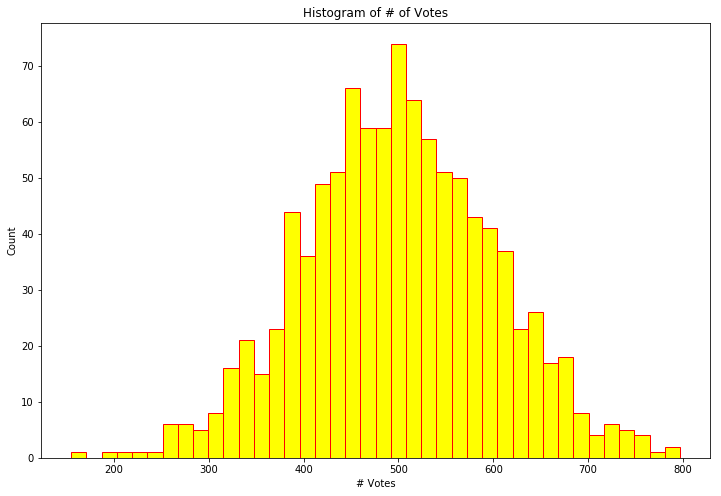

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(analyst_data['Votes'], facecolor='yellow', edgecolor='red', bins=40)

plt.xlabel('# Votes')
plt.ylabel('Count')

plt.title('Histogram of # of Votes')

plt.show()

In [7]:
analyst_data['Variability'] = analyst_data[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']].var(axis=1)

analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes,Variability
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550,0.751824
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670,0.350491
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546,0.771014
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400,1.522004
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572,0.709765


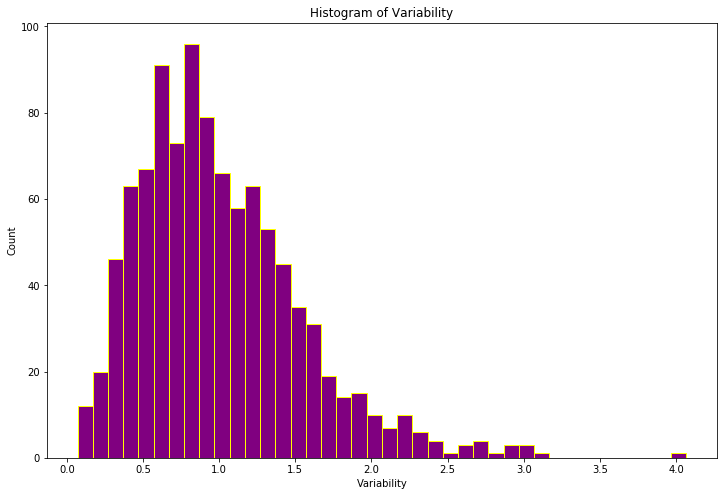

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(analyst_data['Variability'], facecolor='purple', edgecolor='yellow', bins=40)

plt.xlabel('Variability')
plt.ylabel('Count')

plt.title('Histogram of Variability')

plt.show()

In [9]:
linear_regression = LinearRegression().fit(X, y)

linear_regression.score(X, y)

0.008116291372005646

In [10]:
y_predict = linear_regression.predict(X)

In [11]:
results_df = pd.DataFrame({'y_actual': y['Votes'], 
                           'y_predicted': y_predict.reshape(1, -1)[0]})

results_df.head()

,y_actual,y_predicted
0,550,494.619586
1,670,503.899640
2,546,510.953328
3,400,502.212805
4,572,496.418362


Text(0.5, 1.0, 'Regression Results - Scatter')

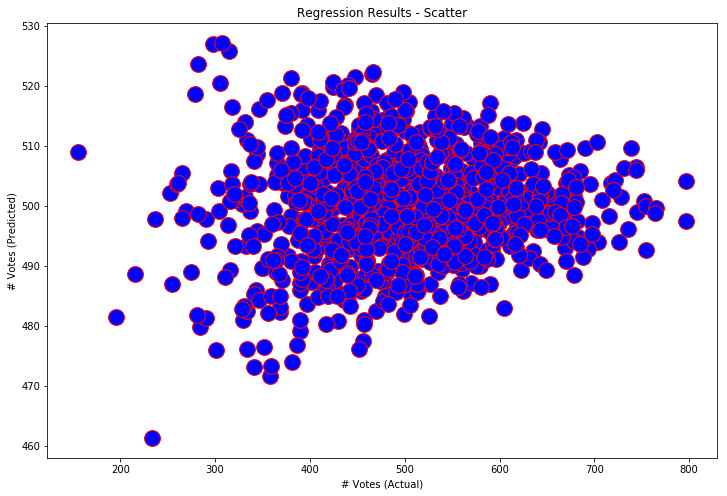

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y, y_predict, facecolor='blue', edgecolor='red', s=250)

plt.ylabel('# Votes (Predicted)')
plt.xlabel('# Votes (Actual)')

plt.title('Regression Results - Scatter')

In [13]:
X_chi_sq = analyst_data[['Variability']]
X_chi_sq.head()

,Variability
0,0.751824
1,0.350491
2,0.771014
3,1.522004
4,0.709765


In [20]:
power_transformer = PowerTransformer(method='box-cox')

# FOR RECORDING: After running everything, need to remove 
# the previous line and use this line below and run everything till the end again
# power_transformer = PowerTransformer(method='yeo-johnson')

X_transformed = power_transformer.fit(X_chi_sq).transform(X_chi_sq)

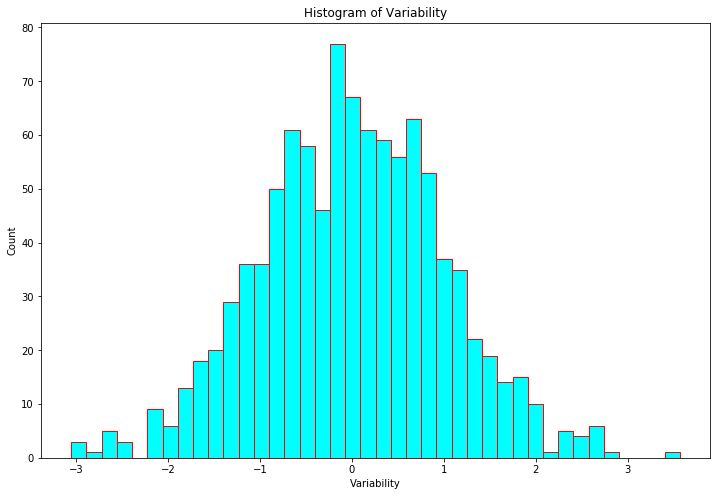

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(X_transformed, facecolor='cyan', edgecolor='red', bins=40)

plt.xlabel('Variability')
plt.ylabel('Count')

plt.title('Histogram of Variability')

plt.show()

In [43]:
minmax_scaler = MinMaxScaler(feature_range=(0, 100))

In [47]:
height_df['minmax_estimator_scaled'] = \
    minmax_scaler.fit_transform(height_df['Height'].values.reshape(-1, 1))

height_df.head()

,Height,scaled,range_scaled,minmax_scaled,minmax_estimator_scaled
0,172.0,-0.019046,27.272727,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727,27.272727


In [43]:
minmax_scaler = MinMaxScaler(feature_range=(0, 100))

In [47]:
height_df['minmax_estimator_scaled'] = \
    minmax_scaler.fit_transform(height_df['Height'].values.reshape(-1, 1))

height_df.head()

,Height,scaled,range_scaled,minmax_scaled,minmax_estimator_scaled
0,172.0,-0.019046,27.272727,27.272727,27.272727
1,178.0,0.975828,45.454545,45.454545,45.454545
2,170.0,-0.350671,21.212121,21.212121,21.212121
3,168.0,-0.682295,15.151515,15.151515,15.151515
4,172.0,-0.019046,27.272727,27.272727,27.272727


## Power Transformer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

In [2]:
analyst_data = pd.read_csv('Datasets/Analyst_Forecasts.csv')
analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572


In [3]:
X = analyst_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']]

y = analyst_data[['Votes']]

In [4]:
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056


In [5]:
y.describe()

,Votes
count,1000.000000
mean,500.013000
std,100.042408
min,155.000000
25%,435.000000
50%,500.000000
75%,568.000000
max,797.000000


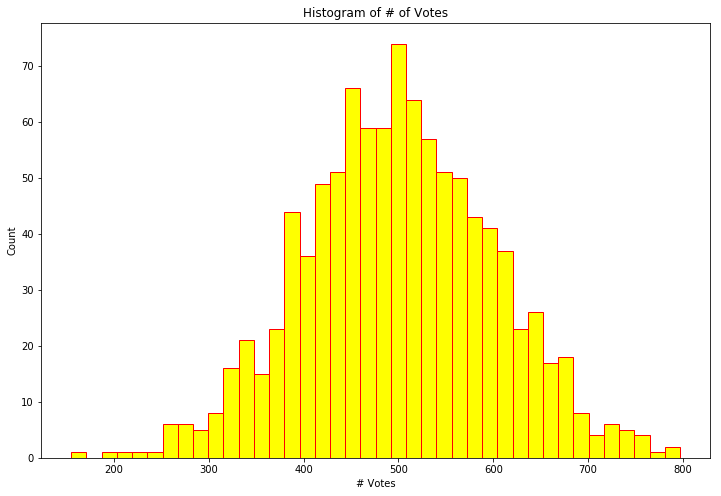

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(analyst_data['Votes'], facecolor='yellow', edgecolor='red', bins=40)

plt.xlabel('# Votes')
plt.ylabel('Count')

plt.title('Histogram of # of Votes')

plt.show()

In [7]:
analyst_data['Variability'] = analyst_data[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']].var(axis=1)

analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes,Variability
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550,0.751824
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670,0.350491
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546,0.771014
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400,1.522004
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572,0.709765


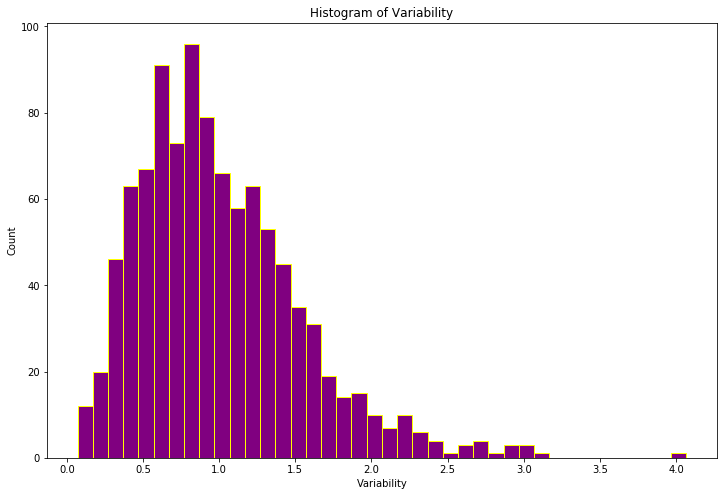

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(analyst_data['Variability'], facecolor='purple', edgecolor='yellow', bins=40)

plt.xlabel('Variability')
plt.ylabel('Count')

plt.title('Histogram of Variability')

plt.show()

In [9]:
linear_regression = LinearRegression().fit(X, y)

linear_regression.score(X, y)

0.008116291372005646

In [10]:
y_predict = linear_regression.predict(X)

In [11]:
results_df = pd.DataFrame({'y_actual': y['Votes'], 
                           'y_predicted': y_predict.reshape(1, -1)[0]})

results_df.head()

,y_actual,y_predicted
0,550,494.619586
1,670,503.899640
2,546,510.953328
3,400,502.212805
4,572,496.418362


Text(0.5, 1.0, 'Regression Results - Scatter')

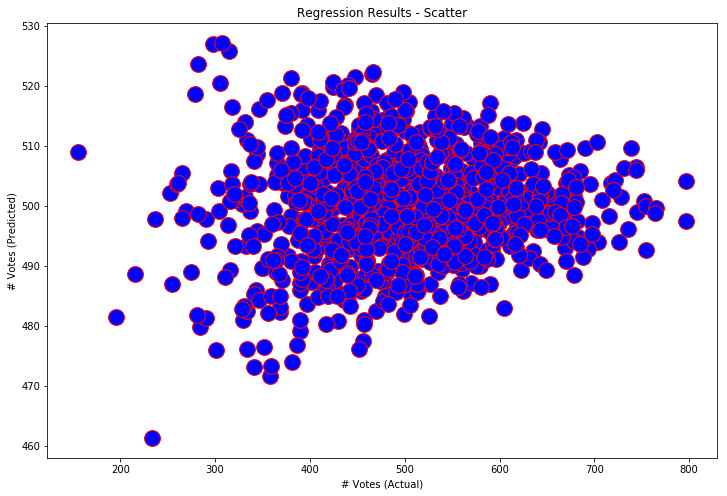

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y, y_predict, facecolor='blue', edgecolor='red', s=250)

plt.ylabel('# Votes (Predicted)')
plt.xlabel('# Votes (Actual)')

plt.title('Regression Results - Scatter')

In [13]:
X_chi_sq = analyst_data[['Variability']]
X_chi_sq.head()

,Variability
0,0.751824
1,0.350491
2,0.771014
3,1.522004
4,0.709765


In [20]:
power_transformer = PowerTransformer(method='box-cox')

# FOR RECORDING: After running everything, need to remove 
# the previous line and use this line below and run everything till the end again
# power_transformer = PowerTransformer(method='yeo-johnson')

X_transformed = power_transformer.fit(X_chi_sq).transform(X_chi_sq)

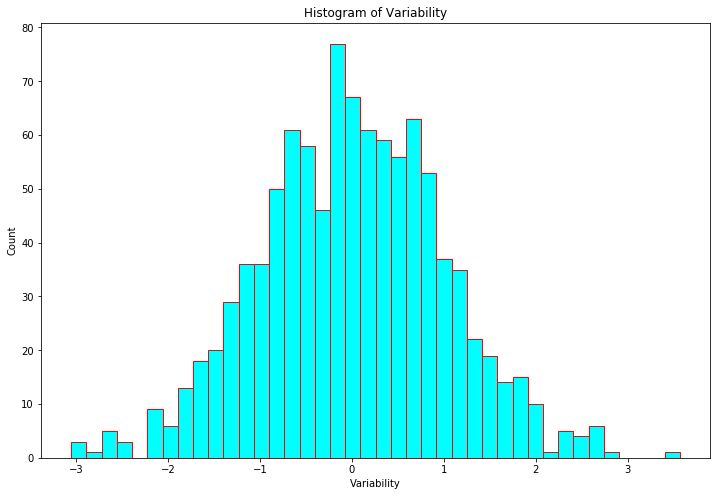

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(X_transformed, facecolor='cyan', edgecolor='red', bins=40)

plt.xlabel('Variability')
plt.ylabel('Count')

plt.title('Histogram of Variability')

plt.show()

## Quantile Transformer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [2]:
store_visits = pd.read_csv('Datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
107,1065.176085,5365.880426,1
29,944.029099,4778.145498,1
54,1111.266087,5572.330435,1
246,448.209371,711.495997,0
46,1035.582877,5198.914385,1
359,458.643641,692.001749,0
323,447.200785,758.166689,0
140,893.830404,4495.152021,1
303,499.864498,714.244680,0
22,1031.964538,5170.822692,1


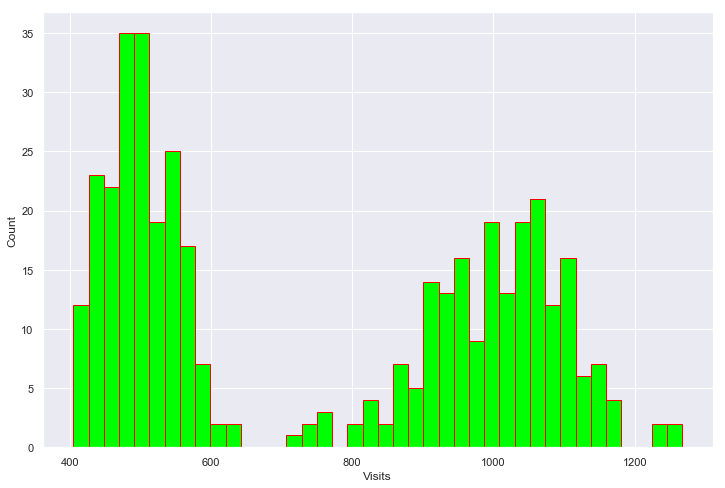

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'], facecolor='lime', edgecolor='red', bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

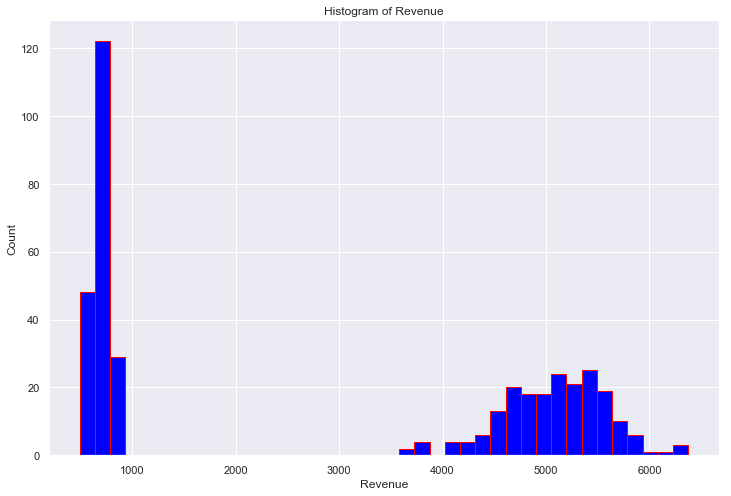

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'], facecolor='blue', edgecolor='red', bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [5]:
transformer = QuantileTransformer(output_distribution='normal')

store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

In [6]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.692537,0.733348
1,0.989320,0.989586
2,0.317696,0.336921
3,0.371256,0.432007
4,1.210072,1.236359


In [7]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.692537,0.733348
1,1058.607260,5349.036298,1,0.989320,0.989586
2,935.069490,4756.347453,1,0.317696,0.336921
3,952.360965,4849.804826,1,0.371256,0.432007
4,1078.384010,5467.920052,1,1.210072,1.236359


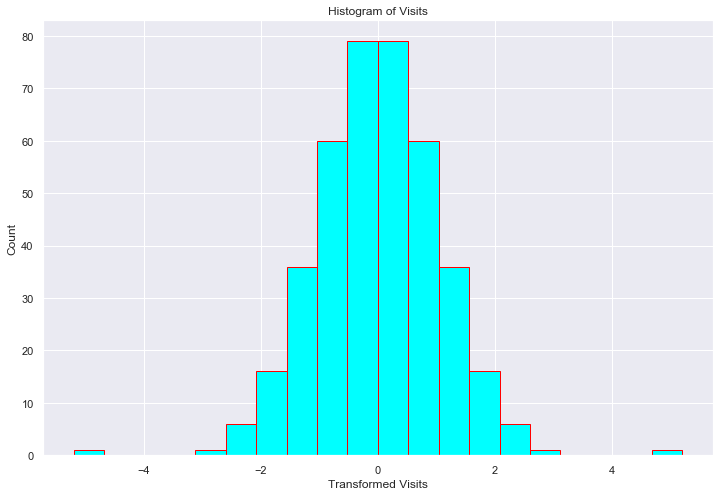

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'], facecolor='cyan', edgecolor='red', bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

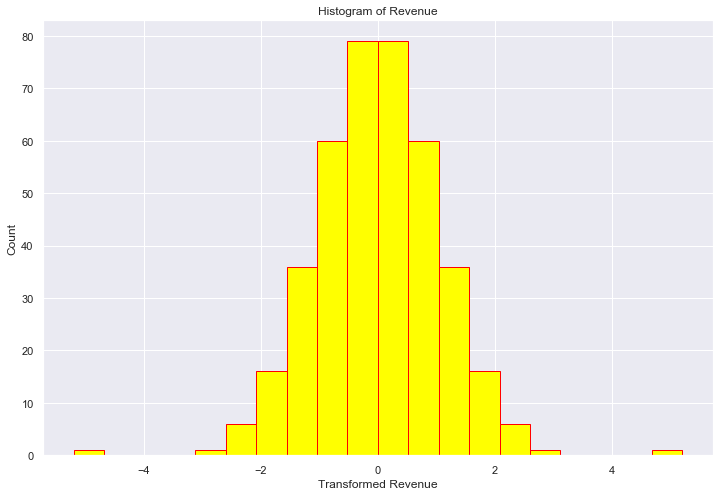

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'], facecolor='yellow', edgecolor='red', bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

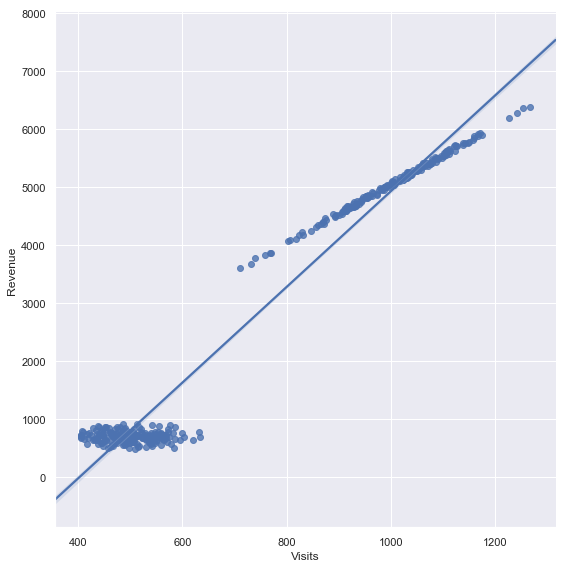

In [10]:
sns.lmplot(x="Visits", y="Revenue", data=final_df, height=8)

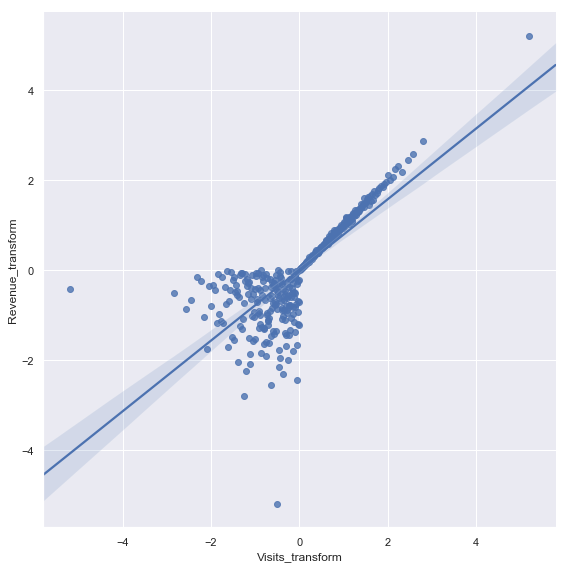

In [11]:
g = sns.lmplot(x="Visits_transform", y="Revenue_transform", data=final_df, height=8)